In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt

learnt = read_csv("learnt_auc.csv", names=["rho", "h2s", "i", "svm", "lr"])
learnt

,rho,h2s,i,svm,lr
0,0.5,0.05,10,0.856783,0.844755
1,0.5,0.05,11,0.916295,0.907645
2,0.5,0.05,12,0.860770,0.850725
3,0.5,0.05,13,0.849888,0.845703
4,0.5,0.05,14,0.895249,0.882745
...,...,...,...,...,...
1195,0.0,1.00,5,0.873737,0.874860
1196,0.0,1.00,6,0.928013,0.933036
1197,0.0,1.00,7,0.942270,0.943678
1198,0.0,1.00,8,0.904018,0.890346


In [3]:
thresh = read_csv("thresh_auc.csv", names=["rho", "h2s", "i", "k", "p_svm", "ae_svm", "p_lr", "ae_lr"])
thresh

,rho,h2s,i,k,p_svm,ae_svm,p_lr,ae_lr
0,0.5,0.05,10,5,0.694825,0.670490,0.641399,0.607273
1,0.5,0.05,10,25,0.791469,0.781818,0.781119,0.685035
2,0.5,0.05,10,100,0.857063,0.810769,0.800559,0.758322
3,0.5,0.05,10,300,0.868531,0.832448,0.795804,0.753566
4,0.5,0.05,11,5,0.770508,0.588449,0.630441,0.601004
...,...,...,...,...,...,...,...,...
4795,0.0,1.00,8,300,0.918806,0.918806,0.869699,0.866908
4796,0.0,1.00,9,5,0.720106,0.765434,0.806034,0.820495
4797,0.0,1.00,9,25,0.877503,0.882925,0.848304,0.849833
4798,0.0,1.00,9,100,0.941324,0.953281,0.904894,0.947998


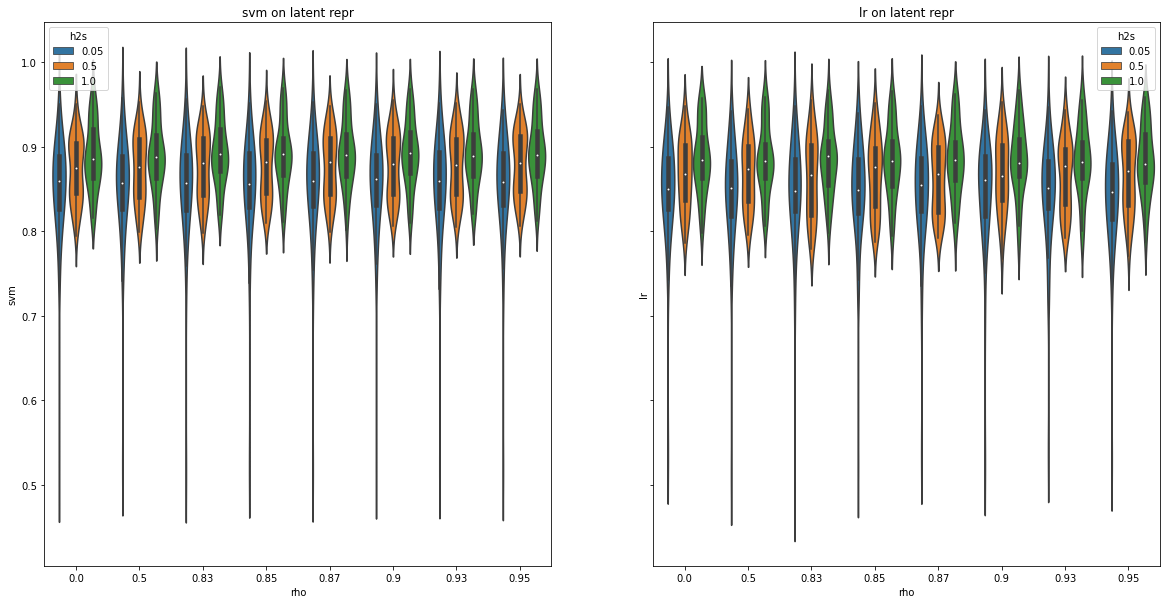

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
plt.sca(axes[0])
sns.violinplot(x=learnt["rho"], y=learnt["svm"], hue=learnt["h2s"])
plt.title("svm on latent repr")
plt.sca(axes[1])
plt.title("lr on latent repr")
sns.violinplot(x=learnt["rho"], y=learnt["lr"], hue=learnt["h2s"])
plt.savefig("latent.jpeg")

Manually choose effect size for three classes of SNPs: 10(D_C) high effect size, 1000(d_c) weak effect size, d - 10 - 1000 effect size and look at how thresh methods capture. look into results of effect size to make guess on effect sizes

In [8]:
method="svm"
sum(thresh[f"ae_{method}"] - thresh[f"p_{method}"] > 0)/4800

0.473125

In [12]:
[sum(thresh[f"ae_{method}"] - thresh[f"p_{method}"] > i)/4800 for i in [0, 0.05, 0.1, 0.15, 0.2]]

[0.473125, 0.14875, 0.04041666666666666, 0.0077083333333333335, 0.00125]

In [13]:
thresh.shape

(4800, 8)

In [44]:
perf_diff = lambda df: [round(sum(df[f"ae_{method}"] - df[f"p_{method}"] > i)/df.shape[0], 4) if df.shape[0] > 0 else 0 for i in [0, 0.05, 0.1, 0.15, 0.2]]

In [45]:
for k in np.unique(thresh["k"]):
    df=thresh.query(f"k == {k}")
    print(f"k={k}", perf_diff(df))

k=5 [0.4858, 0.2767, 0.1025, 0.0292, 0.005]
k=25 [0.555, 0.2167, 0.0542, 0.0017, 0.0]
k=100 [0.4958, 0.1008, 0.005, 0.0, 0.0]
k=300 [0.3558, 0.0008, 0.0, 0.0, 0.0]


In [33]:
import pandas as pd

pd.DataFrame(data, )

,0,1,2
0,0.356875,0.541250,0.521250
1,0.080000,0.178125,0.188125
2,0.020000,0.039375,0.061875
3,0.002500,0.000625,0.020000
4,0.000000,0.000000,0.003750


In [30]:
from seaborn import barplot
import numpy as np

def calc_diff(h2s):
    df=thresh.query(f"h2s == {h2s}")
    return perf_diff(df)

data = np.array([calc_diff(h2s) for h2s in [0.05, 0.5, 1]]).T
barplot(x=[0, 0.05, 0.1, 0.15, 0.2], y=data[0, :])

ValueError: Grouper for '<class 'numpy.float64'>' not 1-dimensional

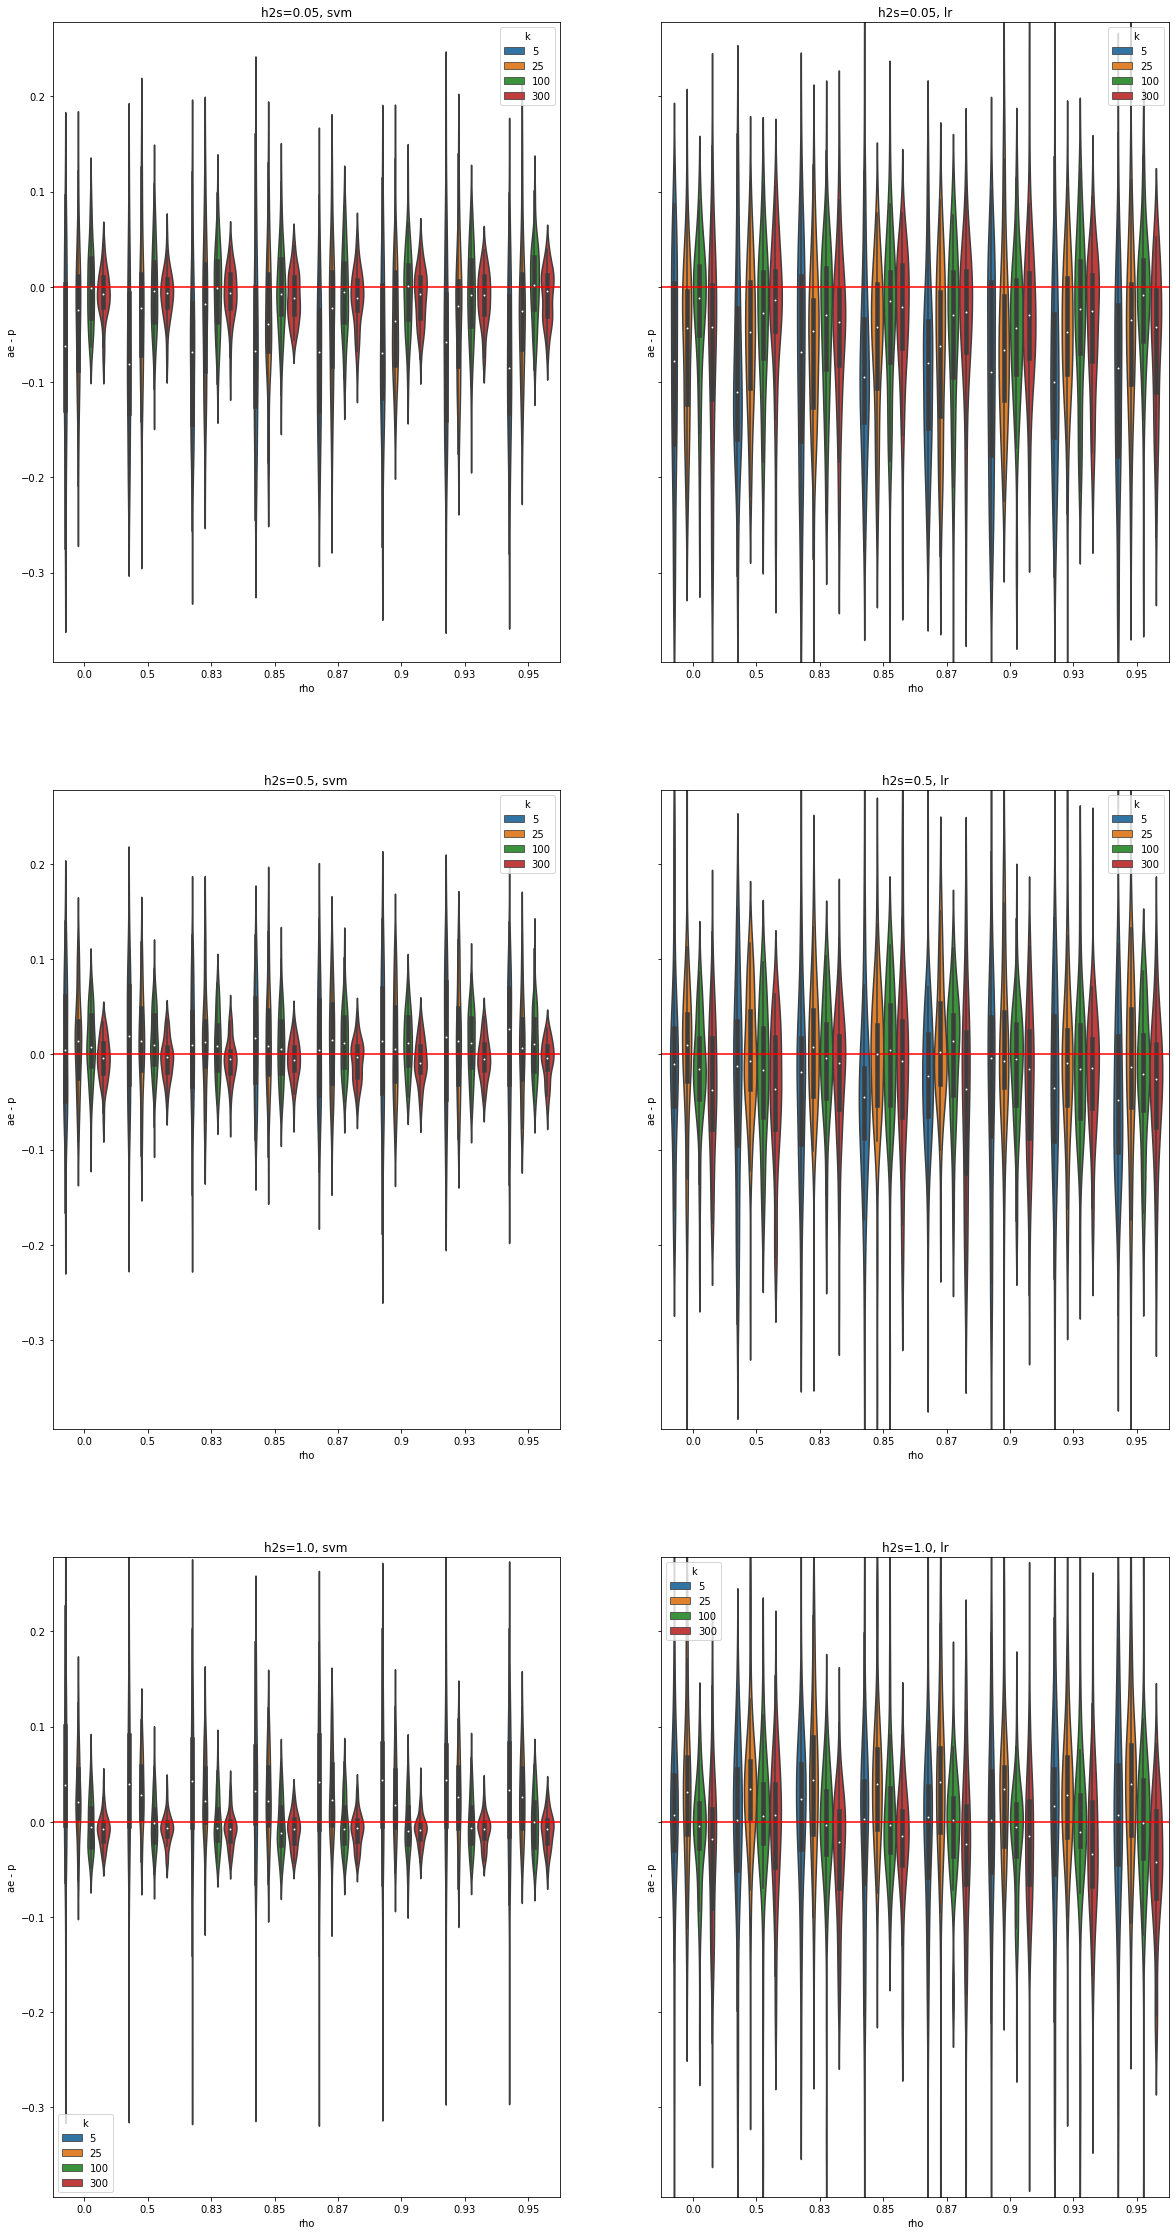

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(20, 40), sharey=True)
methods = ["svm", "lr"]

for i, h2s in enumerate([0.05, 0.5, 1.0]):
    df = thresh.query(f"h2s == {h2s}")
    for method, ax in zip(methods, axes[i, :]):
        plt.sca(ax)
        sns.violinplot(x=df["rho"], y=df[f"ae_{method}"] - df[f"p_{method}"], hue=df["k"])
        xmin, xmax = ax.set_ylim()
        ax.axhline(color="red")
        plt.ylabel("ae - p")
        ax.set_title(f"h2s={h2s}, {method}")
        
plt.savefig("difference_rho.jpeg")

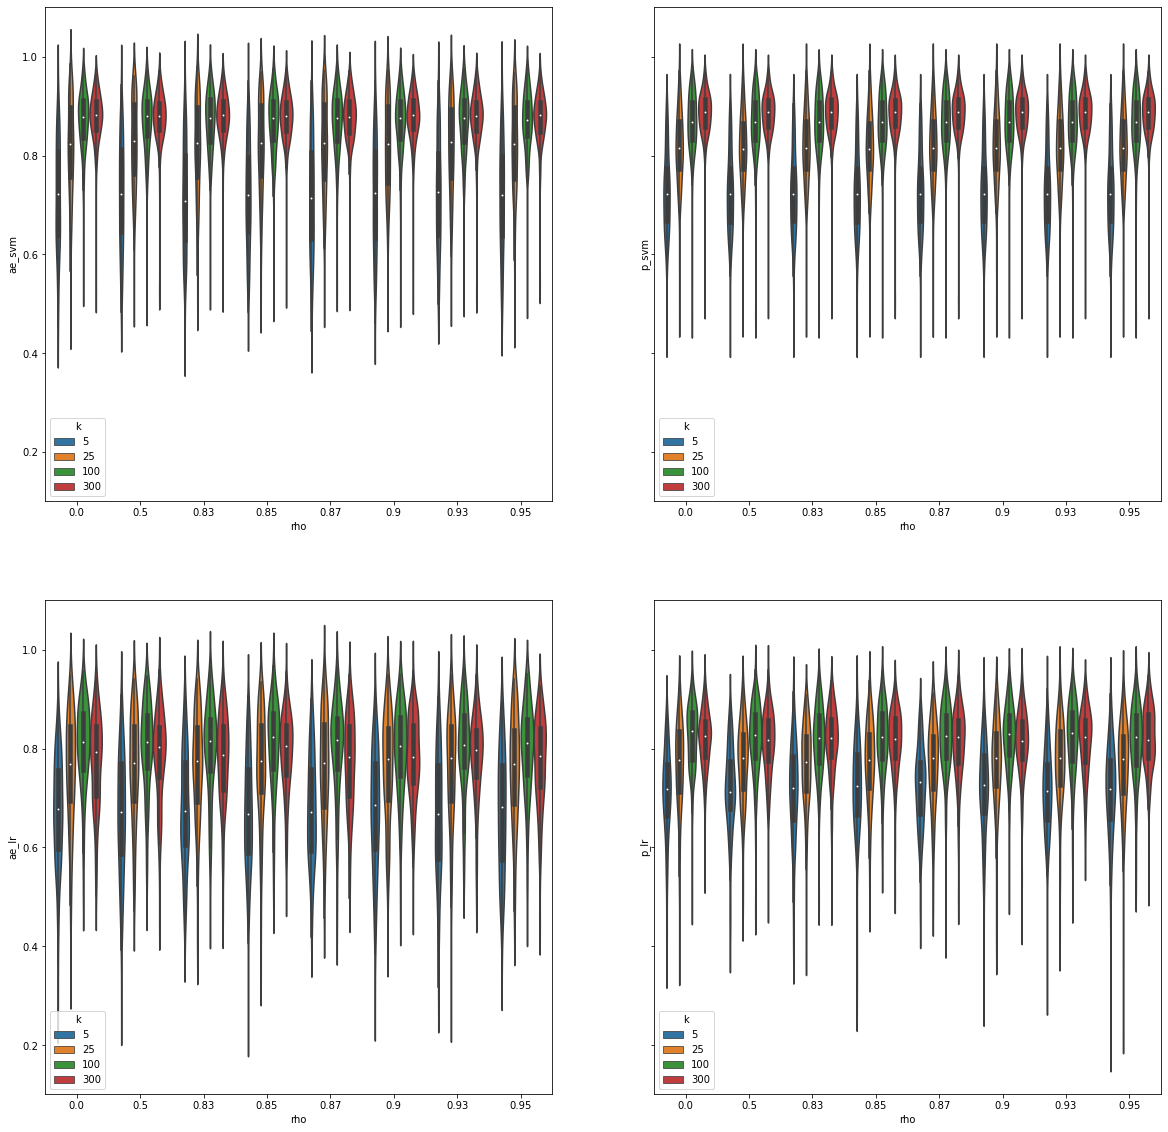

In [83]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(20, 20))

for j, th in enumerate(["ae", "p"]):
    for i, method in enumerate(methods):
        plt.sca(axes[i, j])
        sns.violinplot(x=thresh["rho"], y=thresh[f"{th}_{method}"], hue=thresh["k"])
        
plt.savefig("rho_ae_p_thresh.jpeg")

In [ ]:
from pandas import rea

In [91]:
for r2 in ["0.2", "0.5", "0.8"]:
    df = read_csv("/home/shussain/")

'As'

rhos = ['0.95', '0.93', '0.85', '0', '0.5', '0.83', '0.87', '0.9']
for rho in rhos:
    path = f"results/rho_{rho}"
    for h2s in os.listdir(path):
        for i in os.listdir(path + "/" + h2s):
            p = path + "/" + h2s + "/" + i
            with open(p + "/thresh_auc.csv", 'r') as f:
                out = rho+","+f.read()[:-1].replace("\n", f"\n{rho},")+"\n"
            with open(p + "/thresh_auc1.csv", 'w') as f:
                f.write(out)
            